<a href="https://colab.research.google.com/github/Yyssjj96/__practice___/blob/main/practice_stats2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# 모집단 생성
np.random.seed(42)
population_size = 10000
population = np.random.normal(loc=50, scale=10, size=population_size)  # 평균 50, 표준편차 10인 정규분포 모집단

# 단순 무작위 추출
def simple_random_sample(population, sample_size):
    return np.random.choice(population, size=sample_size, replace=False)

sample_size = 100
sample = simple_random_sample(population, sample_size)

# 모집단과 표본의 통계량 계산
population_mean = np.mean(population)
population_std = np.std(population)
sample_mean = np.mean(sample)
sample_std = np.std(sample)

# 모집단과 표본의 차이 계산
mean_difference = population_mean - sample_mean
std_difference = population_std - sample_std

# 표본평균의 표준오차 계산
sem = sample_std / np.sqrt(sample_size)

# 결과 출력
print(f"모집단 평균: {population_mean:.2f}")
print(f"모집단 표준편차: {population_std:.2f}")
print(f"표본 평균: {sample_mean:.2f}")
print(f"표본 표준편차: {sample_std:.2f}")
print(f"평균의 차이: {mean_difference:.2f}")
print(f"표준편차의 차이: {std_difference:.2f}")
print(f"표본평균의 표준오차: {sem:.2f}")

모집단 평균: 49.98
모집단 표준편차: 10.03
표본 평균: 51.17
표본 표준편차: 10.65
평균의 차이: -1.19
표준편차의 차이: -0.62
표본평균의 표준오차: 1.07


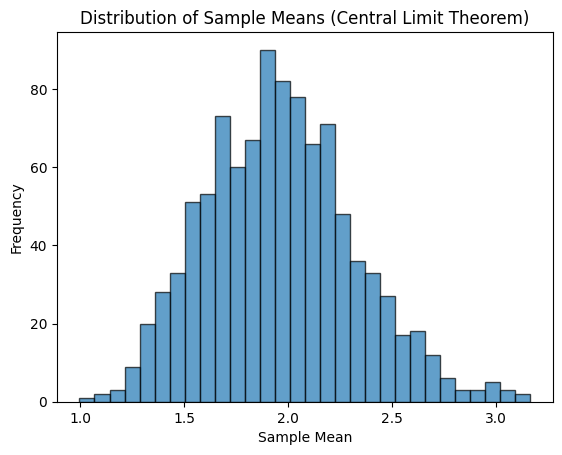

모집단 평균: 1.95
모집단 표준편차: 1.95
표본평균의 표준오차 (SEM): 0.36


In [2]:
# 중심극한정리 : 표본의 크기가 충분하면, 모집단의 분포와 상관없이 정규분포를 따르게 된다.
import matplotlib.pyplot as plt

# 모집단 생성 (정규분포가 아닌 경우 예시)
np.random.seed(42)
population = np.random.exponential(scale=2, size=10000)  # 지수분포를 따르는 모집단

# 파라미터 설정
sample_size = 30  # 표본 크기
num_samples = 1000  # 표본 개수

# 여러 개의 표본을 추출하고 표본평균을 계산
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))

# 표본평균의 분포를 시각화
plt.hist(sample_means, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sample Means (Central Limit Theorem)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

# 모집단과 표본평균의 분포 비교
population_mean = np.mean(population)
population_std = np.std(population)
sem = population_std / np.sqrt(sample_size)

print(f"모집단 평균: {population_mean:.2f}")
print(f"모집단 표준편차: {population_std:.2f}")
print(f"표본평균의 표준오차 (SEM): {sem:.2f}")

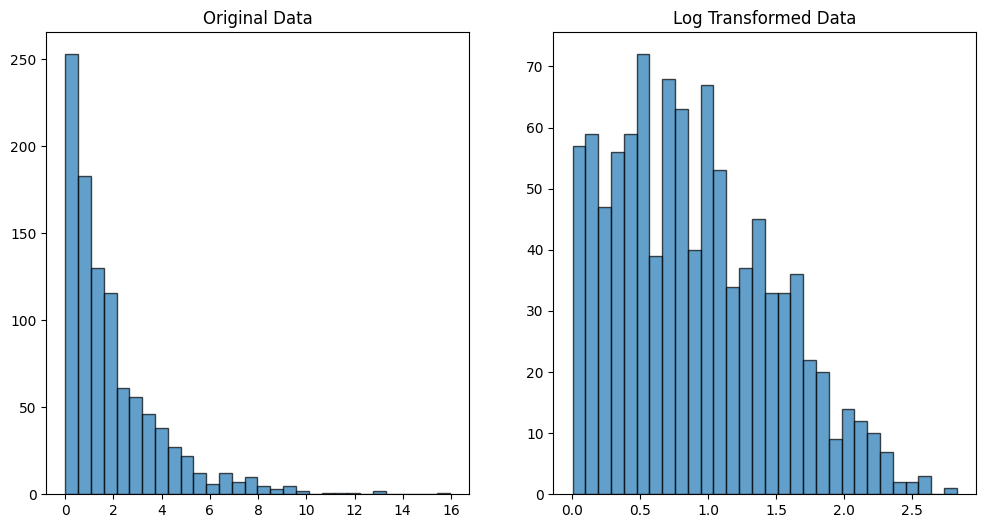

In [3]:
data = np.random.exponential(scale=2, size=1000)

# 로그 변환
log_data = np.log(data + 1)  # 0 이하의 값을 피하기 위해 1을 더함

# 변환 전후의 히스토그램 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, edgecolor='k', alpha=0.7)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.hist(log_data, bins=30, edgecolor='k', alpha=0.7)
plt.title('Log Transformed Data')

plt.show()

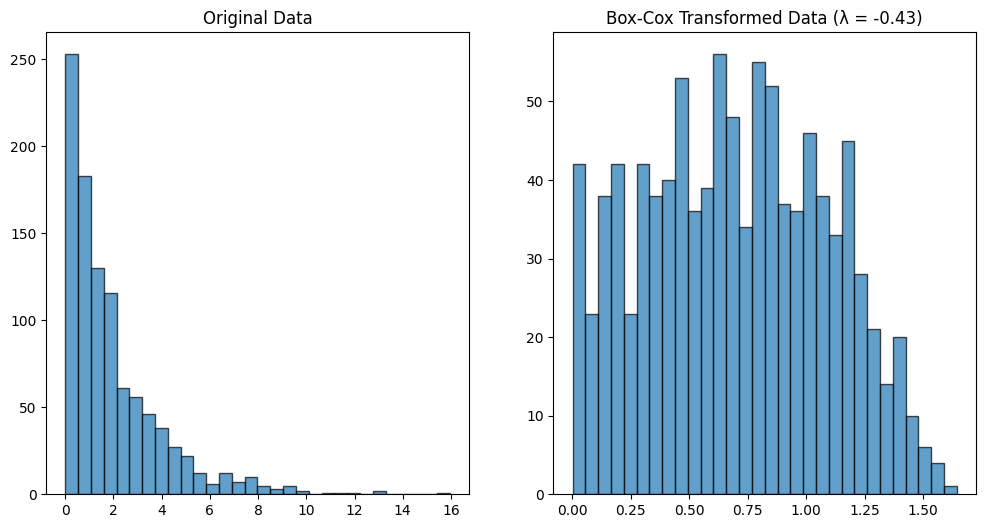

Shapiro-Wilk Test:
Statistic = 0.9775, p-value = 0.0000
데이터는 정규분포를 따르지 않습니다.


In [5]:
from scipy import stats

# Box-Cox 변환
boxcox_data, lmbda = stats.boxcox(data + 1)  # 0 이하의 값을 피하기 위해 1을 더함

# 변환 전후의 히스토그램 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, edgecolor='k', alpha=0.7)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.hist(boxcox_data, bins=30, edgecolor='k', alpha=0.7)
plt.title(f'Box-Cox Transformed Data (λ = {lmbda:.2f})')

plt.show()

statistic, p_value = stats.shapiro(boxcox_data)
print(f'Shapiro-Wilk Test:')
print(f'Statistic = {statistic:.4f}, p-value = {p_value:.4f}')

if p_value > 0.05:
    print('데이터는 정규분포를 따릅니다.')
else:
    print('데이터는 정규분포를 따르지 않습니다.')

# 0.000 < 0.05 귀무가설 기각 정규분포를 따르지 않는다.